In [18]:
# Imports :

from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import hdbscan
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import time

In [19]:
# Function to cast each line (x,y) of a given dataset into a tab of points P(x,y):
# ==>Preperating the dataset to be accepted as parameter in our clustering methods :

def transform_dataset(data):
    x=[]
    y=[]
    P=[]
    tab=[]
    #print(data)
    for i in range (0,len(data)):
        x.append(data[i][0])  
        y.append(data[i][1])
        P.append(data[i][0])
        P.append(data[i][1])
        tab.append(P)
        P=[]
    tab=np.array(tab)    
    return tab    

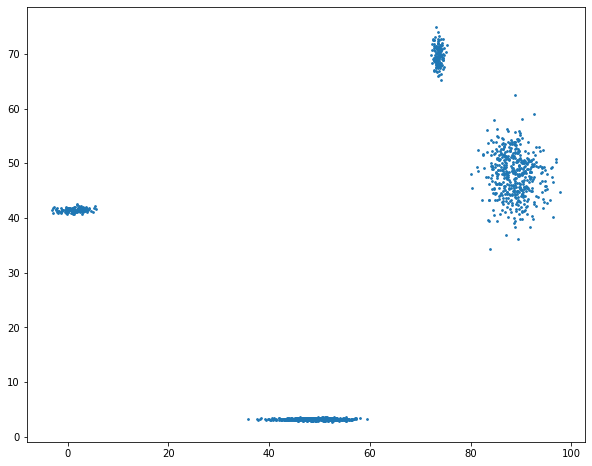

In [20]:
# 1- K-Means Clustering :

# * Reading the dataset :
data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/2d-4c.arff","r"))[0]
# or :
#data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/2d-10c.arff","r"))[0]

# Show the initial dataset :
x=[]
y=[]
for i in range (0,len(data)):
    x.append(data[i][0])  
    y.append(data[i][1])
plt.figure(figsize=(10,8))
plt.scatter(x,y, s=3)

K-Means runtime =  42.98 ms


Text(0.5, 1.0, 'Clustering with K-means')

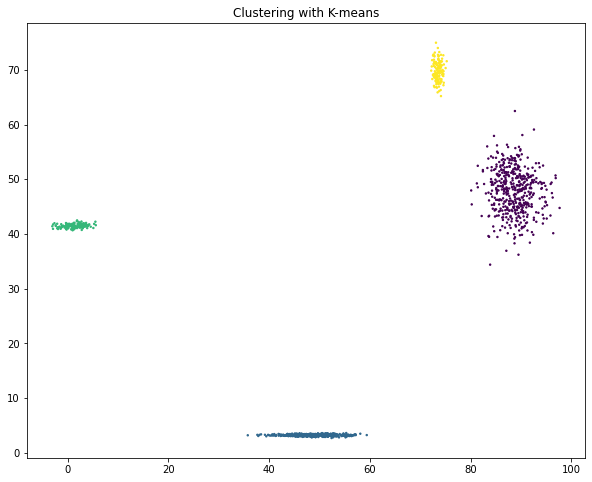

In [21]:
# Applying the K-Means algo :
tps1 = time.time()
tab = transform_dataset(data)
y_k = KMeans(n_clusters=4,init='k-means++', n_init=10,max_iter=1000).fit_predict(tab)
tps2 = time.time()

print("K-Means runtime = ", round((tps2 - tps1)*1000,2),"ms")

plt.figure(figsize=(10,8))
plt.scatter(x, y, c=y_k, s=2)
plt.title("Clustering with K-means")


In [22]:
# Evaluation of K-Means with some metrics :

print("-----------------------------------Silhouette Coefficient-----------------------------------------------------")
print(metrics.silhouette_score(tab, y_k, metric='euclidean'))
print("----------------------------------------------------------------------------------------------------------------")

print("----------------------------------Calinski-Harabasz Index-------------------------------------------------------")
print(metrics.calinski_harabasz_score(tab, y_k))
print("-----------------------------------------------------------------------------------------------------------------")

print("---------------------------------Davies-Bouldin-------------------------------------------------------------------")
print(davies_bouldin_score(tab, y_k))
print("-------------------------------------------------------------------------------------------------------------------")


-----------------------------------Silhouette Coefficient-----------------------------------------------------
0.8670311065845322
----------------------------------------------------------------------------------------------------------------
----------------------------------Calinski-Harabasz Index-------------------------------------------------------
36113.11601994804
-----------------------------------------------------------------------------------------------------------------
---------------------------------Davies-Bouldin-------------------------------------------------------------------
0.16559018665371716
-------------------------------------------------------------------------------------------------------------------


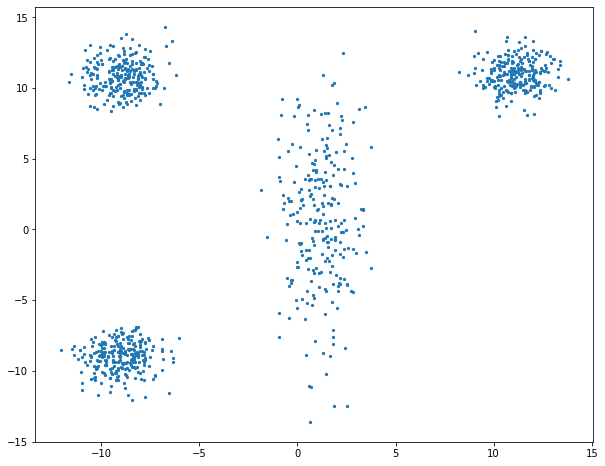

In [23]:
# 2 - Agglomeratif Clustering 

#data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/diamond9.arff","r"))[0]
data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/triangle1.arff","r"))[0]

# Show the initial dataset :
x=[]
y=[]
for i in range (0,len(data)):
    x.append(data[i][0])  
    y.append(data[i][1])
plt.figure(figsize=(10,8))
plt.scatter(x,y, s=5)

nb clusters = 4 , Aglomeratif runtime =  25.14 ms


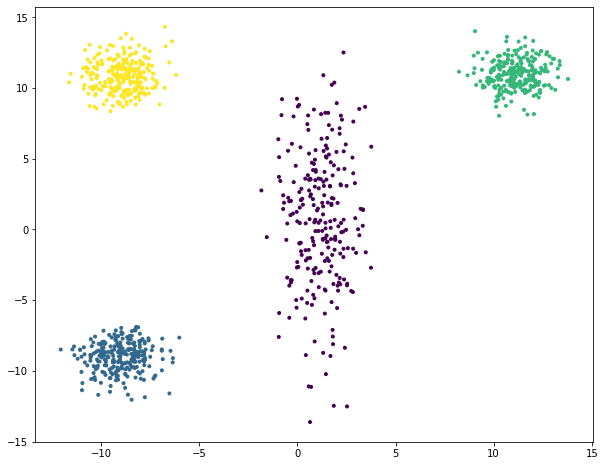

In [24]:
# Applying the aglomeratif algo :

tps1 = time.time()
tab = transform_dataset(data)
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single').fit(tab) #this two params are more important to get the best result !
tps2 = time.time()
clustering.labels_
plt.figure(figsize=(10,8))
plt.scatter(x,y, c=clustering.labels_, s=9)
k=4
print("nb clusters =",k,", Aglomeratif runtime = ", round((tps2 - tps1)*1000,2),"ms")

In [25]:
# Evaluation of Agglomeratif Clustering with Metrics :

print("****************  Silhouette Coefficient *****************")
print(metrics.silhouette_score(tab, clustering.labels_, metric='euclidean'))
print("-------------------------------------------------------------------------------------------")

print("*****************  Calinski-Harabasz Index  ******************")
print(metrics.calinski_harabasz_score(tab,clustering.labels_))
print("-------------------------------------------------------------------------------------------")

****************  Silhouette Coefficient *****************
0.7811191809142772
-------------------------------------------------------------------------------------------
*****************  Calinski-Harabasz Index  ******************
6185.7664402469045
-------------------------------------------------------------------------------------------


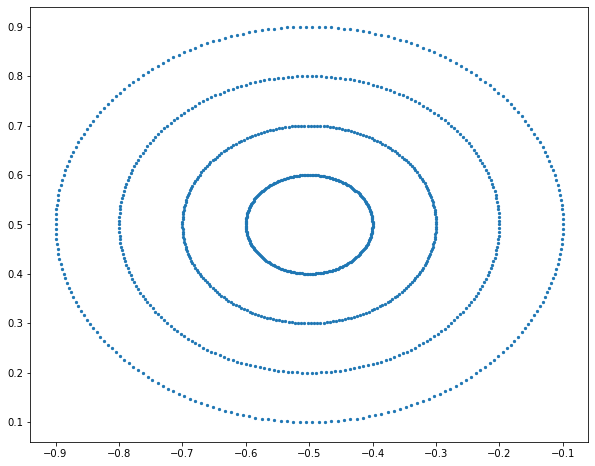

In [26]:
# 4 - Clustering DBSCAN :

data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/dartboard1.arff","r"))[0]
#data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/diamond9.arff","r"))[0]

# Show the initial dataset :
x=[]
y=[]
for i in range (0,len(data)):
    x.append(data[i][0])  
    y.append(data[i][1])
plt.figure(figsize=(10,8))
plt.scatter(x,y, s=5)

runtime =  10.62 ms


<Figure size 432x288 with 0 Axes>

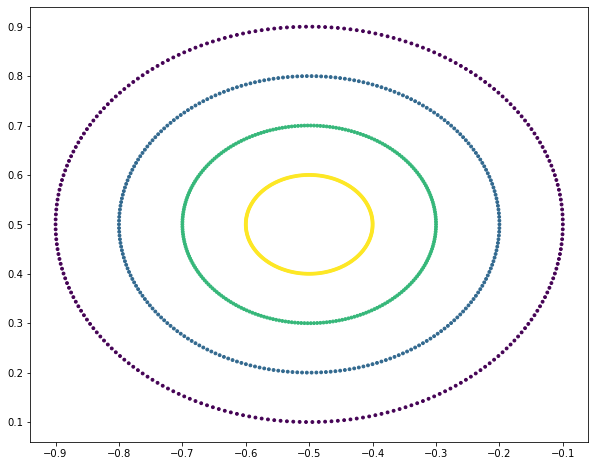

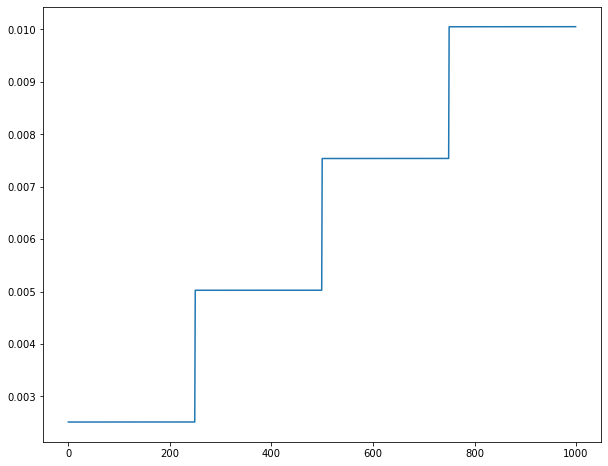

In [27]:
#DBSCAN Algo :

tps1 = time.time()
tab = transform_dataset(data)
db = DBSCAN(eps=0.06, min_samples=5).fit(tab)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
labels = db.labels_

#print(labels)

plot1=plt.figure(1)
plt.figure(figsize=(10,8))
plt.scatter(x,y, c=labels,s=8)

# Function to calculate the distance for which a point has a certain nbr of neighbours :
# to help us determine the right values of the params (eps, min_samples)

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(tab)
distances, indices = nbrs.kneighbors(tab)

distances = np.sort(distances, axis=0)
#print(distances)
distances = distances[:,1]
#print(distances)

plot2=plt.figure(2)
plt.figure(figsize=(10,8))
plt.plot(distances)

In [28]:
# EVALUATION with Metrics :

print("****************  Silhouette Coefficient *****************")
print(metrics.silhouette_score(tab, clustering.labels_, metric='euclidean'))
print("*************************")

print("*****************  Calinski-Harabasz Index  ******************")
print(metrics.calinski_harabasz_score(tab,clustering.labels_))
print("*************************")

****************  Silhouette Coefficient *****************
-0.042578419131562954
*************************
*****************  Calinski-Harabasz Index  ******************
6.172425386667216e-28
*************************


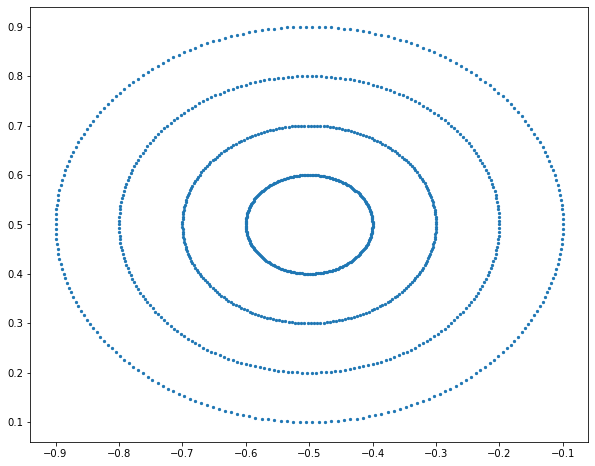

In [29]:
# Clustering HDBSCAN:

#data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/donut1.arff","r"))[0]
#data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/2d-4c-no4.arff","r"))[0]
data = arff.loadarff(open("./clustering-benchmark/src/main/resources/datasets/artificial/dartboard1.arff","r"))[0]

# Show the initial dataset :
x=[]
y=[]
for i in range (0,len(data)):
    x.append(data[i][0])  
    y.append(data[i][1])
plt.figure(figsize=(10,8))
plt.scatter(x,y, s=5)

runtime =  14.46 ms


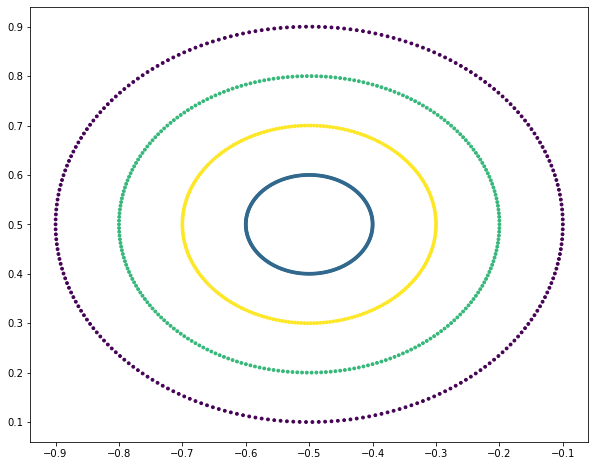

In [30]:
# Applying clustering HDBSCAN:

clusterer = hdbscan.HDBSCAN()
tps1 = time.time()
cluster_labels = clusterer.fit_predict(tab)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

plt.figure(figsize=(10,8))
plt.scatter(x,y, c=cluster_labels, s=8)